# FAST FOOD INC.

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FAST FOOD INC. offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24

#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** Write the code to check the shape of the dataset and write your observations based on that. (0.5 mark)

In [3]:
# 'df.shape' will return a list with 2 values: first one is the number of rows at the dataset
# and the second value is the number of columns on the dataset
df.shape

(1898, 9)

#### Observations:
* Dataset contains 1898 observations and 9 features.

### Question 2: Write the observations based on the below output from the info() method. (0.5 mark)

In [4]:
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* Based on .info() method it's possible to observe that for each row there exists:
    * 5 integer features
    * 1 float point feature and 
    * 4 string features
* As we do not have information about the customer but just the 'customer_id' on the dataset, it's possible to conclude that the 'customer_id' feature is a foreign-key.
* As noticed in df.shape the dataset has 1898 registers and as we can see after df.info() none of the features has null values because every feature has the same value counts as the total register (1898).

### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same. (0.5 mark)

In [5]:
# converting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data
# converting 'restaurant_name' from  "objects" to "category"
df.restaurant_name = df.restaurant_name.astype('category')
# converting 'cuisine_type' from  "objects" to "category"
df.cuisine_type = df.cuisine_type.astype('category')
# converting 'day_of_the_week' from  "objects" to "category"
df.day_of_the_week = df.day_of_the_week.astype('category')
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:
* Data space required can be reduced converting each dataset feature for the appropriated type.
* Although we had converted three object type feature into category type it is possible to notice that 'rating' is still object type and this requires a deeper analysis because this kind of feature should be an integer or float type.

In [6]:
# Lets see the categorical values at 'rating' feature
df.rating.unique()

array(['Not given', '5', '3', '4'], dtype=object)

#### Observations:
* 'rating' is "object" type because thare are a lot of entries with value 'Not given' which can be computed as a numerical value
* Lets change the 'Not given' values to 'NaN'

In [7]:
# Replacing 'Not given' values on 'rating' by 'NaN' using Numpy.NAN
df.rating.replace('Not given',np.NAN,inplace=True)
# Then converting the 'rating' feature to 'float' type
df.rating = df.rating.astype('float')
# Checking is the process was successfully completed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1162 non-null   float64 
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(2), int64(4)
memory usage: 102.7 KB


### **Question 4:** Write the code to find the summary statistics and write your observations based on that. (1 mark)

In [8]:
# ensuring to display the numbers as float format (not on scientific format)
pd.options.display.float_format = '{:.2f}'.format
# showing the summary statistis for numerical features in transposed format
df.describe().T

count       mean       std        min        25%  \
order_id              1898.00 1477495.50    548.05 1476547.00 1477021.25   
customer_id           1898.00  171168.48 113698.14    1311.00   77787.75   
cost_of_the_order     1898.00      16.50      7.48       4.47      12.08   
rating                1162.00       4.34      0.74       3.00       4.00   
food_preparation_time 1898.00      27.37      4.63      20.00      23.00   
delivery_time         1898.00      24.16      4.97      15.00      20.00   

                             50%        75%        max  
order_id              1477495.50 1477969.75 1478444.00  
customer_id            128600.00  270525.00  405334.00  
cost_of_the_order          14.14      22.30      35.41  
rating                      5.00       5.00       5.00  
food_preparation_time      27.00      31.00      35.00  
delivery_time              25.00      28.00      33.00

In [9]:
# showing the summary statistis for categorical features in transposed format
df.describe(exclude='number').T

count unique          top  freq
restaurant_name  1898    178  Shake Shack   219
cuisine_type     1898     14     American   584
day_of_the_week  1898      2      Weekend  1351

#### Observations:
* Mean cost of each order are not pricy because on average it costs just \$16.50.
* Cost of each order varies from \$4.47 to \$35.41. 
* On average a customer can expect 52 minutes to get the order at hand. Because, on average, it is 27 minutes for food preparation plus 25 minutes for delivery time.
* In the dataset there are 1,898 registers from 178 different restaurants. The Shake Shack is the restaurant with more data in the dataset (219 observations).
* In the dataset there are 1,898 registers from 14 different cuisine types. The American  is the cuisine type  with more data in the dataset (584 observations).
* Also, the dataset has observations on 'Weekday' and 'Weekend' being that the majority of that are from weekends.
* On average the rows that have 'rating' non-NaN values has mean 4.34 and the range of values varies from 3.00 to 5.00 

### **Question 5:** How many orders are not rated? (0.5 mark)

In [10]:
print('Observations not rated: {} '.format(df.rating.isna().sum()))

Observations not rated: 736 


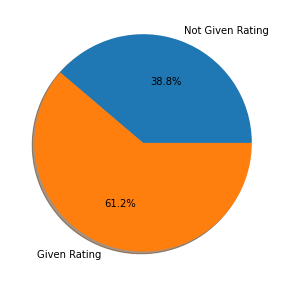

In [11]:
# calculating the sum of all 'NaN' values at 'rating' feature
not_given_r = df.rating.isna().sum()
# calculating the sum of all not 'NaN' values at 'rating' feature
given_r = df.rating.notna().sum()
plt.figure(figsize=(10, 5))
# ploting a pie chat to show the values
plt.pie([not_given_r,given_r], labels=['Not Given Rating','Given Rating'], shadow=True, autopct='%1.1f%%');

#### Observations:
* As noticed above there are 736 orders not rated where 'rating' feature has the value 'NaN'.
* 'Not given' rating are 38.8% of the values
* 'Not given' rating are 61.2.8% of the values

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset. (5 marks)

### First lets take a look at **numerical features** plotting histograms and boxplots using 'histogram_plot' function provided by Professor Kashish Kokhli.

In [12]:
def histogram_boxplot(data, feature, figsize=(10, 5), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (10,5))
    kde: whether to show the density curve (default True)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="yellow"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="summer"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="red", linestyle="-"
    )  # Add median to the histogram

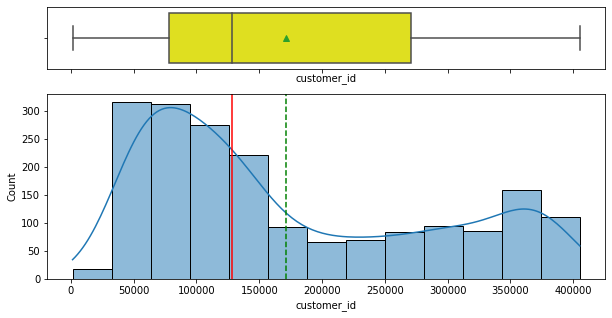

In [13]:
# plotting an histogram and a boxplot for the 'customer_id'
histogram_boxplot(df, 'customer_id')

#### Observations:
* We can suppose that smaller 'customer_id' value refers to older customers thus in the histogram analysis we can see that most of the orders are from customers id from 50,000 to 100,000

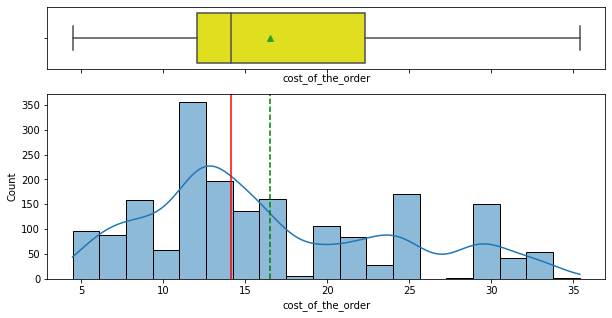

In [14]:
# plotting an histogram and a boxplot for the 'cost_of_the_order'
histogram_boxplot(df, 'cost_of_the_order')

#### Observations:
* Data distribution is right skewed.
* There are some spikes in the graph showing that the order price are around some preferable combinations. We could infer also that the orders are made in predefined combos so the price are also pre-fixed in some groups. In this way maybe there are almost no meal or any combination of meals price to have an order in the range of \$26.00 to \$29.00
* Almost 50% of the orders are in the range of \$10.00 to \$15.00 because the 2nd quartile is \$14.14

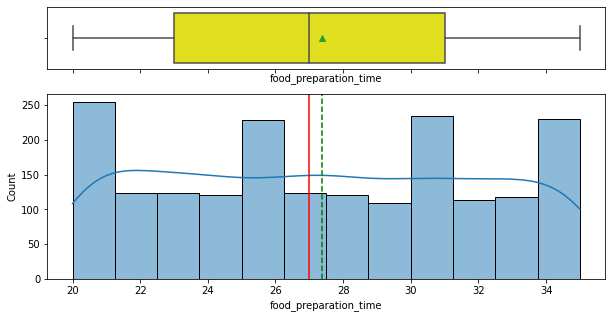

In [15]:
# plotting an histogram and a boxplot for the 'food_preparation_time'
histogram_boxplot(df, 'food_preparation_time')

#### Observations:
* As we can see the orders are almost well distributed over preparation time. 
* It is possible to see that there are some preferable orders that take around 20, 26, 31 and 34 minutes to be done. This is represented as the spikes in the histogram.

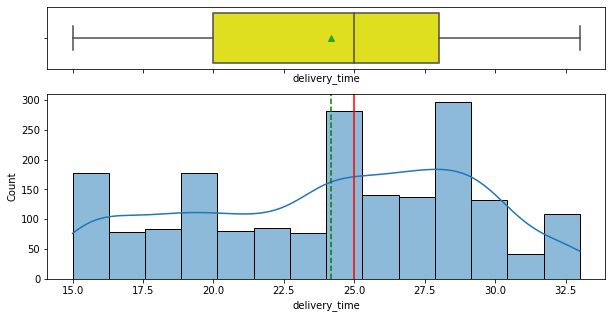

In [16]:
# plotting an histogram and a boxplot for the 'delivery_time'
histogram_boxplot(df, 'delivery_time')

#### Observations:
* Delivery time are almost well distributed over the range. 
* Although there are some spikes in the histogram showing that there are more orders that take around 15, 20, 25 and 31 minutes to deliver.
* Maybe this is related to more orders in the same neighborhoods and thus there are groups of orders that take around the same distance from the restaurant to the delivery point.

In [17]:
# For the sake of searching for a better correlation among features I have decided to create a nem feature called 'total_time' which is the sum
# of 'delivery_time' and 'food_preparation_time' what is in fact the total amount of time that one person will wait to have the food at hand.
df['total_time'] = df.delivery_time + df.food_preparation_time

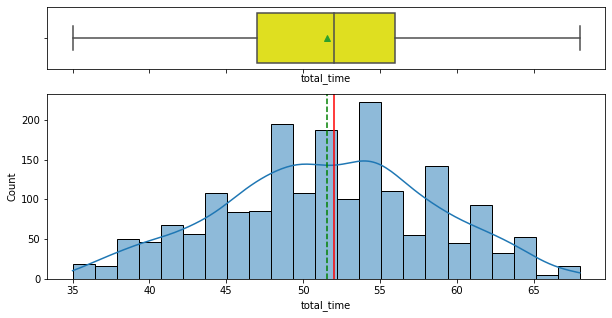

In [18]:
# plotting an histogram and a boxplot for the 'total_time'
histogram_boxplot(df, 'total_time')

#### Observations:
* On average, the total time to deliver the order at customer's hand are mainly around 50 minutes.

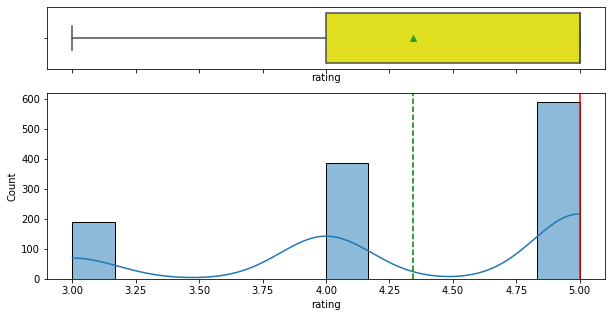

In [19]:
# plotting an histogram and a boxplot for the 'rating'
histogram_boxplot(df, 'rating')

#### Observations:
* 'rating' feature values are distributed just over values range [3.0, 4.0, 5.0] 
* It is possible to notice that most of the 'rating' values are 5.0
* The distribution is left skewed
* As the 'rating' is a number out of 5.0 we can consider that on average the service is well rated (average = 4.34)

### Now lets take a look at **categorical features** plotting a labeled barplot using 'labeled_barplot' function provided by Professor Kashish Kokhli.

In [20]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Set2",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<Figure size 720x504 with 0 Axes>

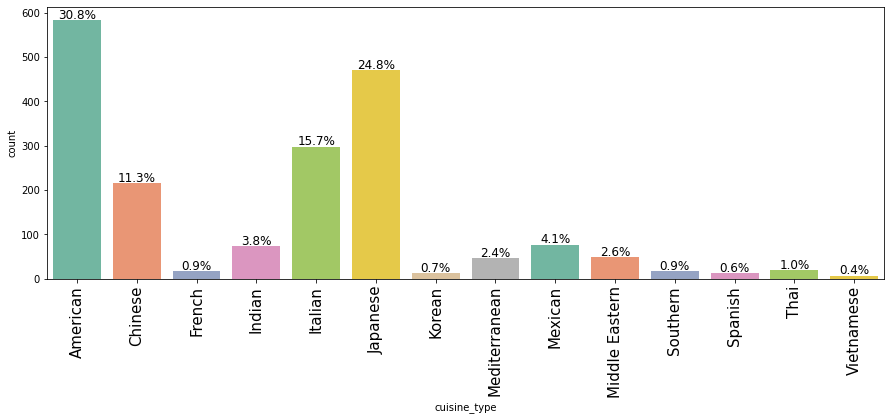

In [21]:
# adjusting the figure to 10x7 size
plt.figure(figsize=(10,7))
# plotting an labeled barplot 'cuisine_type'
labeled_barplot(df, 'cuisine_type', perc=True)

#### Observations:
* In the graph above it is possible to see that American cuisine is the preferable over all other orders.
* In second place Japanese cuisine is the preference.
* American cuisine plus Japanese cuisine are more than 50% of all orders. 
* Vietnamese food is the last ordered cuisine.

<Figure size 720x504 with 0 Axes>

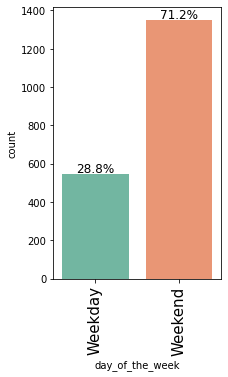

In [22]:
# adjusting the figure to 10x7 size
plt.figure(figsize=(10,7))
# plotting an labeled barplot 'day_of_the_week'
labeled_barplot(df, 'day_of_the_week', perc=True)

#### Observations:
* 71.2% of the orders are done at weekends and just 28.8% of the orders are placed at weekdays.
* There is a huge market to be explored on food delivery at weekdays.

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders. (1 mark)

In [23]:
# Using df.groupby('restaurant_name')['order_id'] to group the data by 'restaurant_name' and feltering only the feature 'order_id'
# then using .count() to count the values of 'order_id' already grouped by 'restaurant_name'
# then using .sort_values(ascending=False) to sort than in descending order by the count of orders id
# showing only the top five results with .head(5)
# This way it is  is possible to find the top 5 restaurants that have received the highest number of orders.
df.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False).head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64

In [24]:
# Using df.groupby('restaurant_name')['order_id'] to group the data by 'restaurant_name' and feltering only the feature 'order_id'
# then using .count() to count the values of 'order_id' already grouped by 'restaurant_name'
# then using .sort_values(ascending=False) to sort than in descending order by the count of orders id
# showing only the top five results with .head(5)
# then dividing the value by  the number of observations (using the first value of 'df.shape' which is this number)
# times 100 to get the proper percentage representation
df.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False).head(5) / df.shape[0] * 100

restaurant_name
Shake Shack                 11.54
The Meatball Shop            6.95
Blue Ribbon Sushi            6.27
Blue Ribbon Fried Chicken    5.06
Parm                         3.58
Name: order_id, dtype: float64

#### Observations:
* Shake Shack restaurant is the top ordered restaurant which corresponds to 11.5% from the total of orders.
* Orders from the top 5 restaurants corresponds to 33.4% from all orders which means that all 178 restaurants this top 5 gets around 1/3 from all orders. 

### Question 8: Write the code to find the most popular cuisine on weekends. (1 mark)

In [25]:
# df[df.day_of_the_week == 'Weekend'] filters the DataFrame to consider just the data where the orders placed are from 'weekends'
# then using this data to group it by 'cuisine_type' but filter just the 'order_id' feature using .groupby('cuisine_type')['order_id']
# then using '.count()' to count the value previously grouped by 'cuisine_type'
# then sorting than in descending order using '.sort_values(ascending=False)' 
# then using '.head(1)' to show just the first how which is the most popular cuisine on weekends
print(df[df.day_of_the_week == 'Weekend'].groupby('cuisine_type')['order_id'].count().sort_values(ascending=False).head(1));
# print an 'space' between the two outputs
print(' ');
# Now lets see the same results but in percentage format using 'df.shape[0]' to get the total number 
# of rows in the dataset and multiplying than by 100 get the proper format
# This way it is  possible  to find the most popular cuisine on weekends.
print(df[df.day_of_the_week == 'Weekend'].groupby('cuisine_type')['order_id'].count().sort_values(ascending=False).head(1)/df.shape[0] * 100);


cuisine_type
American    415
Name: order_id, dtype: int64
 
cuisine_type
American   21.87
Name: order_id, dtype: float64


#### Observations:
* Most orders are from 'American' cuisine which corresponds to 21.86% of all orders.

### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?  (1 mark)

In [26]:
# df[df.cost_of_the_order > 20]['order_id'].count() will filter the DataFrame to consider just the 
# 'cost_of_order' above 20 dollars and output just the 'order_id' which is used to count the values.
# In this way we can find the number of total orders where the cost is above 20 dollars
print('Total orders where cost is above 20 dollars:',df[df.cost_of_the_order > 20]['order_id'].count())
# Now lets use the same idea but dived the result by 'df.shape[0]' which is the total number of rows in the dataset.
# In this way we can get the percentage of such orders in the dataset
# 'format()' function and '{:2.2%}' to show the result in percentage format with 2 floating points 
# This way it is possible to find the number of total orders where the cost is above 20 dollars and 
# show the percentage of such orders in the dataset 
print('It corresponds to {:2.2%} of all orders.'.format(df[df.cost_of_the_order > 20]['order_id'].count()/df.shape[0]))

Total orders where cost is above 20 dollars: 555
It corresponds to 29.24% of all orders.


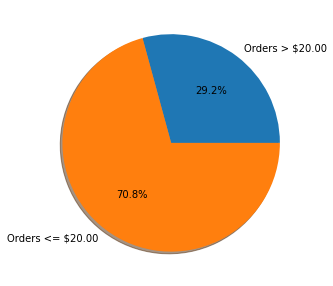

In [27]:
# calculating the sum of orders which cost are greater than 20 dollars
over_20 = df[df.cost_of_the_order > 20]['order_id'].count()
# calculating the sum of orders which cost are lower or equal than 20 dollars.
under_20 = df.shape[0] - over_20
plt.figure(figsize=(10, 5))
# ploting a pie chat to show the values
plt.pie([over_20,under_20], labels=['Orders > $20.00','Orders <= $20.00'], shadow=True, autopct='%1.1f%%');

#### Observations:
* Orders where price is above \$20.00 corresponds to about 1/3 of the total orders.
* These orders are all above the mean order price.


### Question 10: Write the code to find the mean delivery time based on this dataset. (1 mark)

In [28]:
# using the method 'mean()' to get the average value of 'delivery_time' from the 'df' DataFrame.
# 'format()' function and '{:2.2f}' to show the result formatted with 2 floating points 
# This way it is possible to find the mean delivery time based on this dataset.
print('Mean delivery time is {:2.2f} minutes.'.format(df.delivery_time.mean()))

Mean delivery time is 24.16 minutes.


In [29]:
# using the method 'mean()' to get the average value of 'food_preparation_time' from the 'df' DataFrame.
# 'format()' function and '{:2.2f}' to show the result formatted with 2 floating points 
# This way it is possible to find the mean food preparation time based on this dataset.
print('Mean food preparation time is {:2.2f} minutes.'.format(df.food_preparation_time.mean()))

Mean food preparation time is 27.37 minutes.


In [30]:
# using the method 'mean()' to get the average value of 'total_time' from the 'df' DataFrame.
# 'format()' function and '{:2.2f}' to show the result formatted with 2 floating points 
# This way it is possible to find the mean food preparation time based on this dataset.
print('Mean total time is {:2.2f} minutes to have food at hand.'.format(df.total_time.mean()))

Mean total time is 51.53 minutes to have food at hand.


#### Observations:
* Mean delivery time is 24.16 minutes so the client can expect to receive his order around 24.16  minutes after the mean time to prepare the meal which is 27.37 minutes. So, on average, the client will actually get his meal at hand in 51.53 minutes.

### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

In [31]:
# Sorting the 'df' DataFrame by 'cost_of_the_order' in descending 
# order ('ascending=False') and showing only the first row of the resulting DataFrame ('head(1)')
# In this way we can get the customer who has spent the maximum amount on a single order
df.sort_values(by='cost_of_the_order', ascending=False).head(1)


order_id  customer_id restaurant_name   cuisine_type  cost_of_the_order  \
573   1477814        62359           Pylos  Mediterranean              35.41   

    day_of_the_week  rating  food_preparation_time  delivery_time  total_time  
573         Weekday    4.00                     21             29          50

#### Observations:
* customer_id number 62359 is the customer who has spent the maximum amount on a single order and deserves the coupon of 15 dollars. 
* The client ordered Mediterranean food on a ordinary weekday.

### Multivariate Analysis

### Question 12: Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset. (7 marks)

In [32]:
# There are missing values on 'rating' feature what cannot help when computing relationship among features. 
# So my decision is to drop the rows on DataFrame that some values are 'NaN' 
# Creating a new DataFrame called df_c just for plot the graphs with no 'NaN' values at 'rating'
df_c = df.dropna().reset_index(drop=True).copy()

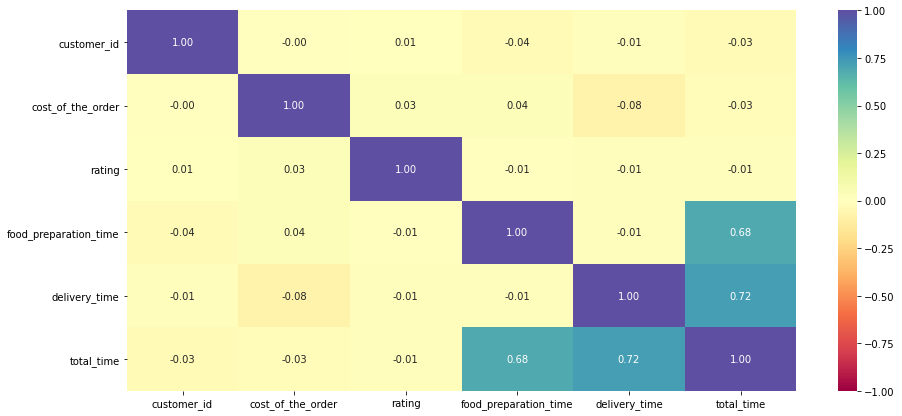

In [33]:
# creating a list of features for further correlation heatmap 
num_var = ['customer_id', 'cost_of_the_order', 'day_of_the_week', 'rating','food_preparation_time', 'delivery_time','total_time']

# a DataFrame with correlation between each pair of numerical features
corr = df_c[num_var].corr()

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

#### Observations:
* Correlation are good between 'total_time' and 'delivery_time'. Also is good between 'total_time' and 'food_preparation_time'. In fact, that is not a surprise since 'total_time' is the sum of such other two features. So de correlation was expect to be good.
* Correlation is 1.0 in the diagonal because it is the correlation between the feature and itself
* Correlation between other  pairs of features in this heatmap is not relevant because all of then are almost zero.

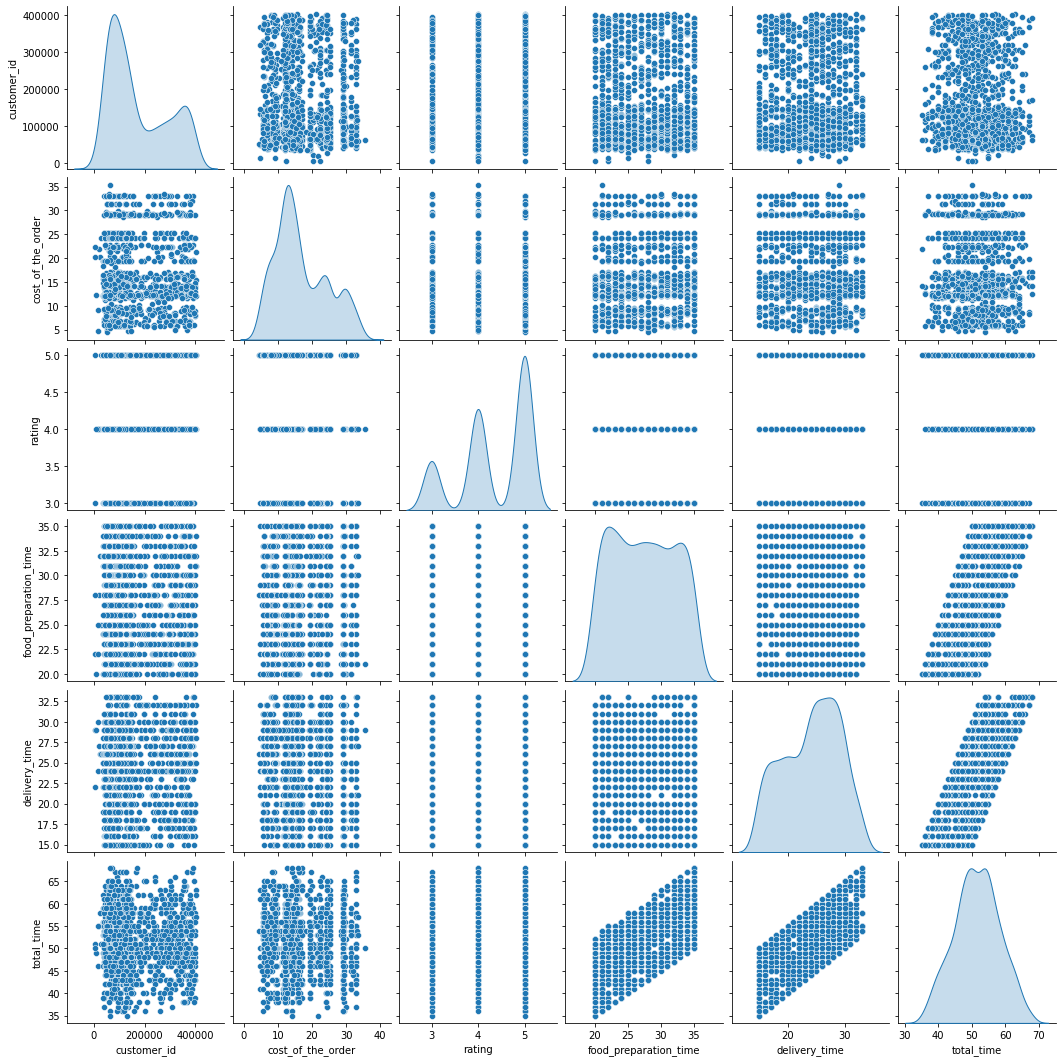

In [34]:
sns.pairplot(data=df_c[num_var], diag_kind="kde")
plt.show()

#### Observations:
*  Pairplots just showing what we saw in the correlation heatmap which is the lack of correlation between pairs of features.

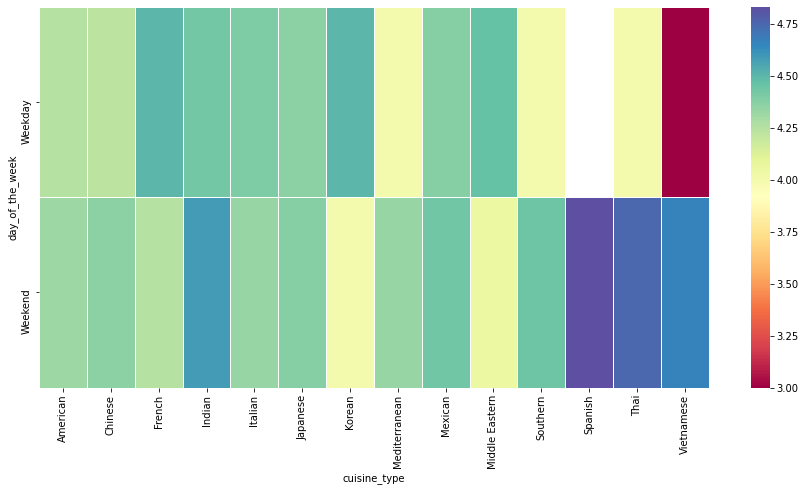

In [35]:
# Pivoting the DataFrame to prepare data to show a heatmap of 'cuisine_type' versus  'day_of_the_week' 
# where the color of the heartmap is the 'rating'
df_hm =df_c.pivot_table(index = 'day_of_the_week',columns ='cuisine_type',values ='rating')
# Draw a heatmap 
plt.figure(figsize = (15,7)) # To resize the plot. 
# Using min scale value as 3 because the minimum value os rating in dataset is 3. Thus, this will produce better visual colors on the graph.
sns.heatmap(df_hm,  fmt="d", cmap='Spectral', linewidths=.5, vmin=3)
plt.show()

#### Observations:
* In general, the cuisine type are well rated in both weekends and weekdays because the ratings are from 3 to 5 (out of 5).
* Spanish, Thai and Vietnamese cuisine are better rated at weekends.
* Vietnamese cuisine are not well rated at weekdays.
* Most ordered cuisine (American, Japanese and Italian) looks to have no variation on rating at weekends and weekdays. One can infer that this cuisine type are more traditional at America and they have well defined process at preparing and delivering the food.

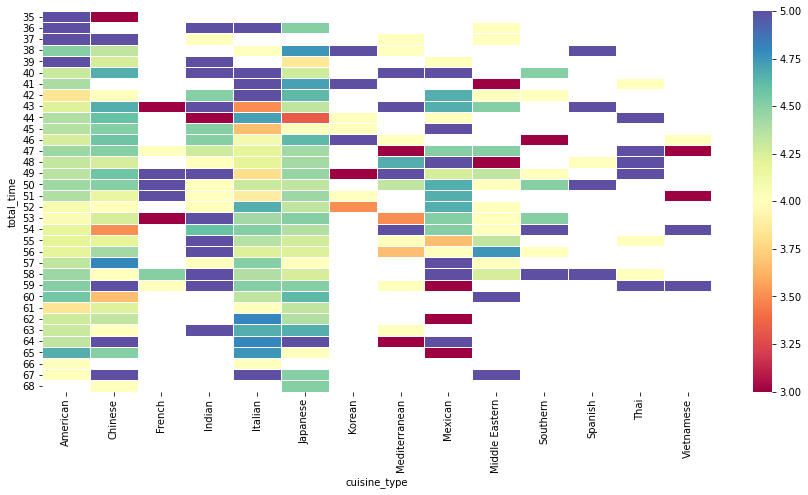

In [36]:
# Pivoting the DataFrame to prepare data to show a heatmap of 'cuisine_type' versus  'total_time' 
# where the color of the heartmap is the 'rating'
df_hm =df_c.pivot_table(index = 'total_time',columns ='cuisine_type',values ='rating')
# Draw a heatmap 
plt.figure(figsize = (15,7)) # To resize the plot
# Using min scale value as 3 because the minimum value os rating in dataset is 3. Thus, this will produce better visual colors on the graph.
sns.heatmap(df_hm,  fmt="d", cmap='Spectral', linewidths=.5, vmin=3)
plt.show()

#### Observations:
* American food are well rated when the total time to get the food are faster. This is, maybe, because of the American culture on fast food.
* There are no  variation on rating in Japanese cuisine related to the total time to get the food.
* In general, French food needs more time for better rating. Probably there are few French restaurants nearby. 
* Vietnamese fast food is definitely not well rated. It takes more time to have a good meal.

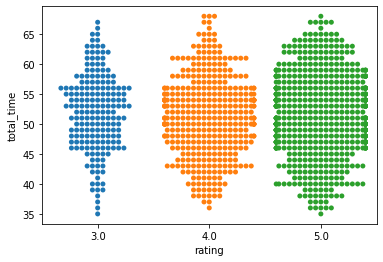

In [37]:
# Swarmplot is useful to see the density of the distribution between two features. 
# In this case we are plotting 'rating' versus 'total_time'
sns.swarmplot(data = df_c, y = 'total_time', x='rating');

#### Observations:
* Visualy it is possible to observe that food well rated ('rating' = 5) is related to 'total_time' in the range of 45-60 minutes of 'total_time'


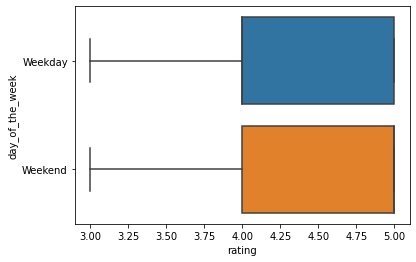

In [38]:
# Boxplot is also useful to see the distribution between two features. 
# In this case we are plotting 'rating' versus 'day_of_the_week'
sns.boxplot(data = df_c, y ='day_of_the_week', x ='rating');

#### Observations:
* In general the 'rating' have the same distribution when we look  at 'weekends' or 'weekdays'

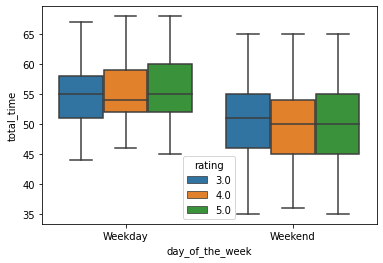

In [39]:
# Boxplot is also useful to see the distribution between two features and a third feature on hue. 
# In this case we are plotting 'day_of_the_week' versus 'total_time' and hue as 'rating' 
sns.boxplot(data = df_c,y='total_time',x='day_of_the_week', hue=df_c['rating']);

#### Observations:
* On weekends the distribution of ratings are pretty the same when the total time to have the food at hand is in the range of 45-55.

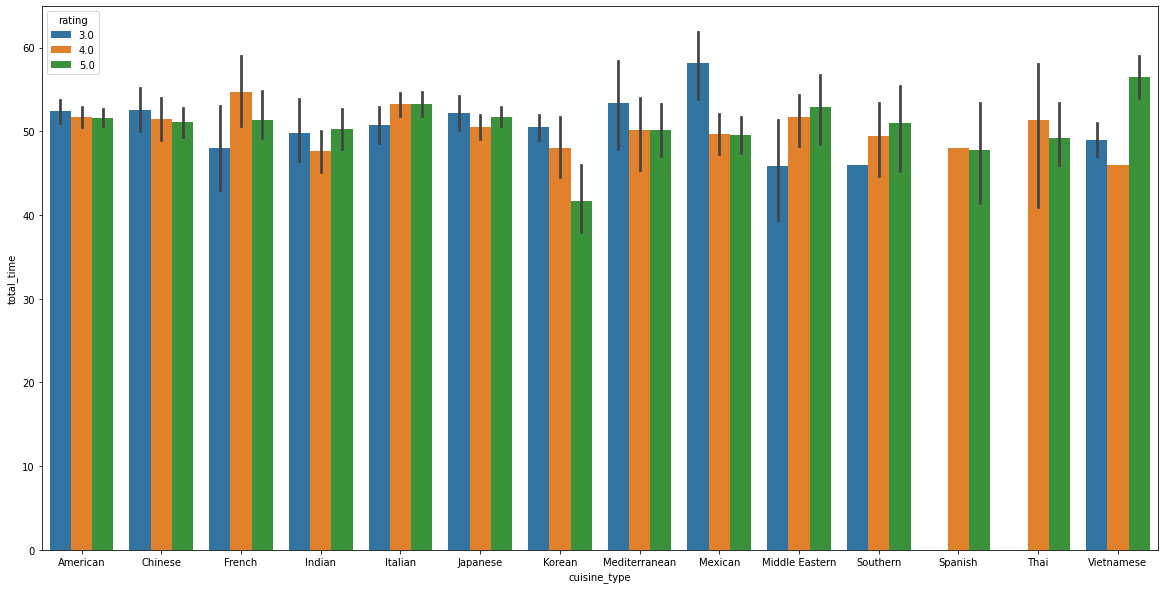

In [40]:
plt.figure(figsize=(20,10))
# Barplot is  useful to see the distribution between two features and a third feature on hue. 
# In this case we are plotting 'cuisine_type' versus 'total_time' and hue as 'rating' 
sns.barplot(data = df_c,y='total_time',x='cuisine_type', hue=df_c['rating']);

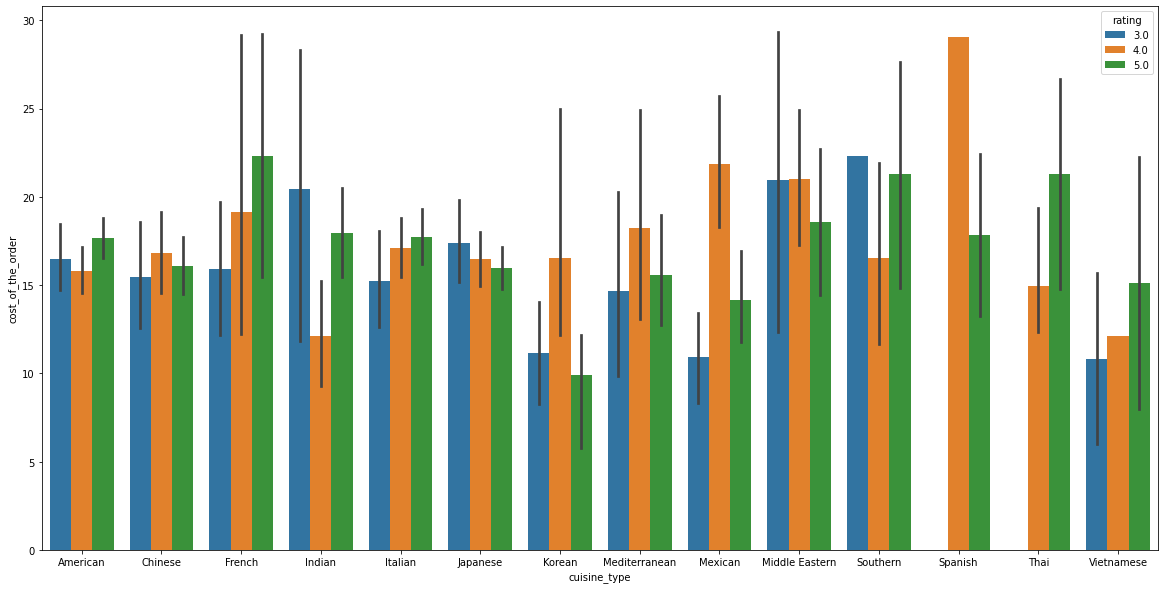

In [41]:
plt.figure(figsize=(20,10))
# Barplot is  useful to see the distribution between two features and a third feature on hue. 
# In this case we are plotting 'cuisine_type' versus 'cost_of_the_order' and hue as 'rating' 
sns.barplot(data = df_c,y='cost_of_the_order',x='cuisine_type', hue=df_c['rating']);

#### Observations:
* French cuisine are better rated on food that costs above the mean.
* Korean food are well rated even on cheap food (below the mean price).
* Vietnamese and Mexican food are not well rated at cheap food (below the mean price).

### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer. (2 marks)

In [42]:
# DataFrame to store the count of ratings grouped by 'restaurant_name'. Notice that we are using the 'df_c' DataFrame
# which has no 'NaN' values at 'rating' feature because we need to consider only data from rated restaurants
df_count = df_c.groupby('restaurant_name')['rating'].count()
# DataFrame to store the mean of ratings grouped by 'restaurant_name'. Notice that we are using the 'df_c' DataFrame
# which has no 'NaN' values at 'rating' feature because we need to consider only data from rated restaurants
df_rating = df_c.groupby('restaurant_name')['rating'].mean()
# Merging both DataFrames in a new one called 'df_criteria' go join mean of ratings and count of ratings for each restaurant
df_criteria = pd.merge(df_count, df_rating,how='outer', on='restaurant_name')
# renaming the columns for the new DAtaFrame called 'df_criteria'
df_criteria.rename(columns={'rating_x':'count_ratings','rating_y':'mean_rating'}, inplace = True)
# Now filtering rows that match the criteria condition which is that the restaurants must have a rating count
# of more than 50 and the average rating should be greater than 4.
df_criteria.loc[(df_criteria.count_ratings > 50) & (df_criteria.mean_rating > 4)]

count_ratings  mean_rating
restaurant_name                                      
Blue Ribbon Fried Chicken             64         4.33
Blue Ribbon Sushi                     73         4.22
Shake Shack                          133         4.28
The Meatball Shop                     84         4.51

#### Observations:
* Just few restaurants have enough orders that were rated and also have mean rating above 4.0
* Restaurants who have many orders still have good rating from customers. This shows that it is possible to have many satisfied customers although they have a lot of orders.


### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset. (2 marks)

In [43]:
# Lets create a new feature called 'charge' to store the charged value according to the criteria that the order will be charged 
# on 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars.
# Using lambda function to calculate and store in the new feature 'charge'
df['charge'] = df.cost_of_the_order.apply(lambda x : x*0.25 if(x > 20) else x * 0.15 if(x>5)&(x<=20) else 0)

In [44]:
# Displaying top 5 rows that match the criteria 'cost_of_the_order' > 20 
# to ensure that the 'charge' value is 25% of the 'cost_of_the_order'
df[df['cost_of_the_order'] > 20].head(5)

order_id  customer_id            restaurant_name cuisine_type  \
0    1477147       337525                    Hangawi       Korean   
3    1477334       106968  Blue Ribbon Fried Chicken     American   
5    1477224       147468           Tamarind TriBeCa       Indian   
12   1476966       129969  Blue Ribbon Fried Chicken     American   
17   1477373       139885  Blue Ribbon Sushi Izakaya     Japanese   

    cost_of_the_order day_of_the_week  rating  food_preparation_time  \
0               30.75         Weekend     NaN                     25   
3               29.20         Weekend    3.00                     25   
5               25.22         Weekday    3.00                     20   
12              24.30         Weekend    5.00                     23   
17              33.03         Weekend     NaN                     21   

    delivery_time  total_time  charge  
0              20          45    7.69  
3              15          40    7.30  
5              24          44    6.30  
12             17          40    6.08  
17             22          43    8.26

In [45]:
# Displaying top 5 rows that match the criteria 'cost_of_the_order' > 5 and 'cost_of_the_order' <= 20
# to ensure that the 'charge' value is 15% of the 'cost_of_the_order'
df[(df['cost_of_the_order'] > 5)&(df['cost_of_the_order'] <= 20)].head(5)


order_id  customer_id            restaurant_name   cuisine_type  \
1   1477685       358141  Blue Ribbon Sushi Izakaya       Japanese   
2   1477070        66393                Cafe Habana        Mexican   
4   1478249        76942           Dirty Bird to Go       American   
6   1477894       157711          The Meatball Shop        Italian   
7   1477859        89574                  Barbounia  Mediterranean   

   cost_of_the_order day_of_the_week  rating  food_preparation_time  \
1              12.08         Weekend     NaN                     25   
2              12.23         Weekday    5.00                     23   
4              11.59         Weekday    4.00                     25   
6               6.07         Weekend     NaN                     28   
7               5.97         Weekday    3.00                     33   

   delivery_time  total_time  charge  
1             23          48    1.81  
2             28          51    1.83  
4             24          49    1.74  
6             21          49    0.91  
7             30          63    0.90

In [46]:
# Displaying top 5 rows that match the criteria 'cost_of_the_order' <= 5
# to ensure that the 'charge' value is 0% of the 'cost_of_the_order'
df[df['cost_of_the_order'] <= 5].head(5)

order_id  customer_id restaurant_name cuisine_type  cost_of_the_order  \
82    1477790       133617     Shake Shack     American               4.75   
390   1477196        50123     Cafe Habana      Mexican               4.85   
480   1476877        53289        The Loop     Japanese               4.66   
542   1477788       270444   P.J. Clarke's     American               4.71   
624   1477349        52327  Nobu Next Door     Japanese               4.47   

    day_of_the_week  rating  food_preparation_time  delivery_time  total_time  \
82          Weekday    4.00                     35             28          63   
390         Weekend    5.00                     28             22          50   
480         Weekend     NaN                     34             25          59   
542         Weekend     NaN                     23             15          38   
624         Weekend    5.00                     28             26          54   

     charge  
82     0.00  
390    0.00  
480    0.00  
542    0.00  
624    0.00

In [47]:
# Now lets properly print the company net revenue just summing the charge value form each row and displaying in currency format
charge_sum = df.charge.sum()
cost_sum = df.cost_of_the_order.sum()
print('Company net revenue generated on all the orders is ${:,.2f}'.format(charge_sum))
print('Sum of all orders is ${:,.2f}'.format(cost_sum))
print('Percentage on the net revenue in the total amount of orders is {:.2%}'.format(charge_sum/cost_sum))

Company net revenue generated on all the orders is $6,166.30
Sum of all orders is $31,314.82
Percentage on the net revenue in the total amount of orders is 19.69%


In [48]:
total_r = df.charge.sum()
f1 = df[df['cost_of_the_order'] > 20]['charge'].sum()
f1p = f1/total_r
f2 = df[(df['cost_of_the_order'] <= 20)&(df['cost_of_the_order'] > 5)]['charge'].sum()
f2p = f2/total_r
f3 = df[df['cost_of_the_order'] <= 5]['charge'].sum()
f3p = f3/total_r
print('Revenue on orders > $20.00: ${:,.2f} which is {:.2%}'.format(f1,f1p))
print('Revenue on orders <= $20.00 and > $5.00: ${:,.2f} which is {:.2%}'.format(f2,f2p))
print('Revenue on orders <= $5.00: ${:,.2f} which is {:.2%}'.format(f3,f3p))

Revenue on orders > $20.00: $3,688.73 which is 59.82%
Revenue on orders <= $20.00 and > $5.00: $2,477.58 which is 40.18%
Revenue on orders <= $5.00: $0.00 which is 0.00%


#### Observations:
* Company net revenue generated on all the orders is \$6,166.30
* Sum of all orders is \$31,314.82
* Percentage on the net revenue in the total amount of orders is \$19.69% of the total revenue
* Revenue on orders > \$20.00: \$3,688.73 which is 59.82%
* Revenue on orders <= \$20.00 and > \$5.00: \$2,477.58 which is 40.18% of the total revenue

### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time. (2 marks)

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [49]:
# 'total_time' was previously calculated as the sum of 'delivery_time' and 'food_preparation_time'
# this peace of code: df['order_id'][df['total_time'] > 60].count() is counting the amount of 'order_id' that match the criteria
# of having 'total_time' greater than 60
print('Percentage of orders that have more than 60 minutes of total delivery time is {:2.2%}'.format(df['order_id'][df['total_time'] > 60].count() / df.shape[0]))

Percentage of orders that have more than 60 minutes of total delivery time is 10.54%


#### Observations:
* Orders that take to much time are also the orders with low rating on certain cuisine types.

### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

In [50]:
# write the code here
df.groupby('day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday   28.34
Weekend   22.47
Name: delivery_time, dtype: float64

#### Observations:
* Mean delivery time on weekdays are greater than on weekends
* This is because in general the traffic on streets is also greater in weekdays when compared to weekends

### Conclusion and Recommendations

### **Question 17:** Write the conclusions and business recommendations derived from the analysis. (3 marks)


#### Introduction

This is a EDA from a food aggregator company service that offers
access to multiple restaurants through a single smartphone app.

Observations are described in the dataset using the following features: order_id, customer_id, restaurant_name, cuisine_type, cost_of_the_order, day_of_the_week, rating, food_preparation_time	and delivery_time.

The dataset contains 9 features and 1,898 observations from  orders for different kind of cuisines and restaurants.

#### Key Insights:

**(1)**: As the objective is to improve the customer experience it is important to have most of the orders rated. In the dataset there are 736 which corresponds to 38,77% of the observation with 'Not given' rating.

**Recommendation**: Increase the customers that rate every orders to have a more confident dataset when analyzing the ratings.


**(2)**: Dataset has no information about localization of each restaurant and day of the week (Monday, Tuesday, etc).

**Recommendation**: Store this information for each order to have more information to analyze and provide a better understanding on customer experience by analyzing the ratings.


**(3)**: There are more observations on customers with low IS. This shows a weak engagement on customers with low id numbers.

**Recommendation**: Provide some way (for example, cashback, gift) to engage new clients on the use of the service.

**(4)**: Almost 50% of the orders are in the range of \$10.00 to \$15.00.

**Recommendation**: Invite more pricy restaurants to use the platform so the revenue on charges will increase the net revenue.

**(5)**: Delivery time is greater on weekdays maybe because of the heavy traffic on the streets. 

**Recommendation**: Use more efficient delivery vehicles like motorcycles and bicycles to avoid being stuck at traffic rush.

**(6)**: All rated observations are rated in the range of 3 to 5. But in the case description the rate is an integer number out of 5. It looks like there are missing observations with rating below 3.

**Recommendation**: Provide a deeper analysis at the source of the data because there is a chance that the dataset is just a portion from a bigger dataset.  

**(7)**: Observations are 28.8% from weekdays and 71.2% from weekends.

**Recommendation**: Promote marketing campaigns to use the app on weekdays.

**(8)**: Total orders where cost is above 20 dollars is 555 which corresponds to 29.24% of all orders. This is the main orders where the charge provides revenue to the company.

**Recommendation**: Increase restaurants and orders where the price on each order are at least 20 dollars. This will help the company to increase the net revenue.

**(9)**: American, Japanese and Italian cuisine types are the preference customers meal. At this cuisine types rating are also greater than other not well desired cuisines, like Vietnamese. Percentage of orders that have more than 60 minutes of total delivery time is 10.54%. Orders that take to much time are also the orders with low rating on certain cuisine types.

**Recommendation**: Provide to the restaurants some kind of training skills for better food preparation and delivery. This would increase customer experience which will engage more clients to make orders using the app.

#### Conclusion:

As the previously data analysis, insights and recommendations suggests there are some opportunities on business growth that will depend on faster delivery time, especially on weekdays. Also, some restaurants at certain cuisine types needs attention on food preparation process to increase the customer experience rating. The company needs to put some effort on trying to get more relevant restaurants with higher food prices to increase the revenue. Another key point is to increase the users of the app that rate the order for each restaurant. This will generate a more solid dataset.  


